## What does Regression even mean!?
Regression to the mean is the phenomenon that if a variable is extreme on its first measurement, it will tend to be closer to the average on its second measurement—and if it is extreme on its second measurement, it will tend to have been closer to the average on its first.

Let's think of this in terms of an example. Let's say your father or mother is a very tall person&mdash;maybe 3-4 standard deviations above the average height. Would you&mdash;their daughter or son&mdash;be more likely to be:
- 3-4 standard deviations from the average height
- 1-2 standard deviations from the average height
- average height

Macroscopic data tells us that it's more likely that you're height will be closer to the average. You'll still be taller than average, but you won't be as tall as your parent. I can attest to this being true in my own case. The same applies if you progress from a shorter than average height parent&mdash;your height will be closer towards the average. This is because height regresses to the mean. It goes back to the more primitive value. 

## Simple Linear Regression
Let's try and understand simple linear regression (also known as univariate linear regression because we are going to use a single predictor variable) by the means of an example. We're going to use a dataset with housing prices for Portland, Oregan, USA. 

**Problem Definition**: Our aim is to predict the housing prices in Portland using the total living area of houses in that county.

1. Is there a relationship between predictor and response? 
    Our first goal should be to determine whether the data provides any evidence of an association between the predictor variable and response variable.

2. Is the relationship between the input and output variable linear? 
    If there is approximately a straight-line relationship between living area and sale price, then linear regression is an appropriate tool. If not, then it may still be possible to transform the predictor or the response so that linear regression can be used.
    
3. How accurately can we estimate the effect of the predictor variable on the response variable?
    Can we accurately measure how much increase (or decrease) in sale price every square meter brings?
    
4. How accurately can we predict future sales given the living area?
    For any given living area in square meters, what is the accuracy of our prediction for the sales price of the house.


Let's try and answer the first two questions.

In [6]:
#Calling in the libraries we plan to use
%matplotlib inline
#matplotlib is the plotting and visualization library for python
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_palette("cubehelix",8)
cmap = sns.cubehelix_palette(reverse=True)
#using the stylesheet for the website "fivethirtyeight"
plt.style.use("seaborn")
#pandas is a great library to explore and navigate through datasets
import pandas as pd
#numpy is the numerical computing library for python
import numpy as np

In [7]:
#Loading in the data
housing_data = pd.read_excel("data/oregon_housing_prices.xlsx")

For simple linear regression, we are only going to be using one predictor variable. In this case that is going to be "GrLivArea" which stands for Ground up living area. Let's chart out a scatter plot between the living area and the sales price to see what relationship do they exhibit.

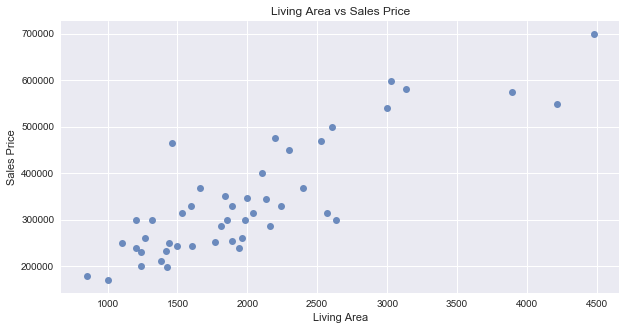

In [8]:
plt.figure(figsize=(10,5))
sns.regplot(housing_data['GrLivArea'],housing_data['SalePrice'], \
            fit_reg=False, scatter_kws={"cmap":cmap}, )
plt.title("Living Area vs Sales Price")
plt.xlabel("Living Area"); plt.ylabel("Sales Price")
plt.show()

This scatter plot looks like Living Area shares a positive linear relationship with Sales Price. Let's go ahead and take out the correlation coefficient and quantify this linear relationship.

**Correlation** is an indicator of how close two variables are to having a linear relationship. It is between the range of -1 and +1 and values towards the extremes indicate a highly negative linear relationship or a highly positive linear relationship respectively. In this case we use _Pearson's Correlation Coefficient_ which is the mostly commonly used correlation coefficient to measure the linear correlation between two variables $X$ and $Y$. 

$$P_{Cr}(X,Y) = {Cov(X,Y)\over{\sigma_X \ \sigma_Y}}$$

Note: We must always keep in mind that correlation is not causation.

$Cov(X,Y)$ is the covariance between two random variables $X$ and $Y$. **Covariance** is the joint variability between two random variables. It describes how the variables change with respect to eachother.

$\sigma_X \ \sigma_Y$ are the **standard deviations** of $X$ and $Y$ respectively. 

In [9]:
#You can define your own
def pearson_cr(X,Y):
    '''
    Arguments:
        X - random variable [list/numpy array/pandas vector]
        Y - random variable [list/numpy array/pandas vector]
    Output:
        Returns correlation coefficient matrix [numpy array]
    '''
    #calculating the covariance
    cov = np.cov(X,Y)
    #calculating the standard deviations
    std1 = np.std(X)
    std2 = np.std(Y)
    return cov/(std1*std2)

#Or you can use numpy
correlation_coefficient = round(np.corrcoef(housing_data['GrLivArea'],housing_data['SalePrice'])[0,1],2)
print(f"Correlation Coefficient for Living Area with respect to Sales Price: {correlation_coefficient}")

Correlation Coefficient for Living Area with respect to Sales Price: 0.85


In [10]:
np.cov(housing_data['GrLivArea'],housing_data['SalePrice'])

array([[6.31551831e+05, 8.49596917e+07],
       [8.49596917e+07, 1.56349765e+10]])

We can interpret the correlation coefficient as showing a very strong positive linear relationship.

### Standardization
Standardization is important to eliminate bias from our model if there is a quantitative difference between the range of data in one random variable from another. For example: if we had two response variables&mdash;living area and number of nearby schools. The living area will be in the hundreds or thousands whereas the number of nearby schools will be in the tens. The living area range will completely minimize the importance of nearby schools. In order to preven that we will standardize our data so that both random variables have a mean of 0 and a standard deviation of 1. This also makes computation faster.

In this case we will not standardize our data because there is not much quantitative difference between the predictor variable X and reponse variable Y.


In [11]:
#Input variable
X = housing_data['GrLivArea'].values.reshape(-1,1)
#Output variable
y = housing_data['SalePrice'].values.reshape(-1,1)

#Standardization
# X = (X-np.mean(X))/(np.std(X))
# y = (y-np.mean(y))/np.std(y)

# print(f'Mean of X: {abs(round(X.mean(),2))} | Standard Deviation of X: {abs(round(X.std(),2))}\n\
# Mean of y: {abs(round(y.mean(),2))} | Standard Deviation of y: {abs(round(y.std(),2))}')

### Finding the Best Fit Line
Now that we know that our predictor and response variables share a linear relationship, we can go ahead. However, let's think about what the problem statement means before we dive into the data. We want to use an _input_&mdash;living area of a house&mdash;to predict an _output_&mdash;price of house. That sounds exactly like a _function_! What is a function but not an input-ouput machine? Our aim here is to best approximate the function that best describes the relationship between living area and the price of the house.

$$ Housing \ Price = F(Living \  Area)$$

Or if we take our housing price as our response variable, $y$ and living area as our input variable, $X$:

$$ y = f(X)$$

Now the structure of our prediction problem so far looks like the following image:

<img src = "images/learning_algorithm.png" width = "300px" height = "500px"/>

Here $h$ is our function and also implies our hypothesis. Our function is trying to use the living area to predict the sales price. Which in a linear relationship means _what coefficient when multiplied with our input variable gives us the output variable_. 

$$ h(\theta) = \beta_0 + \beta_1 \ X + \epsilon$$

$\beta_0$ and $\beta_1$ are two unknown constants that represent the _intercept_ and _slope_ terms in the linear model. Together, $\beta_0$ and $\beta_1$ are known as the model coefficients or parameters. $\epsilon$ is the term for the _irreducible error_. It helps account for whatever part of the dependent variable cannot be predicted by the independent variables in the observed data.

The question now is that how do we best choose $\beta_1$ and $\beta_0$? Can we just use random values? Let's see what happens if we take random values.

### Hit and Trial?

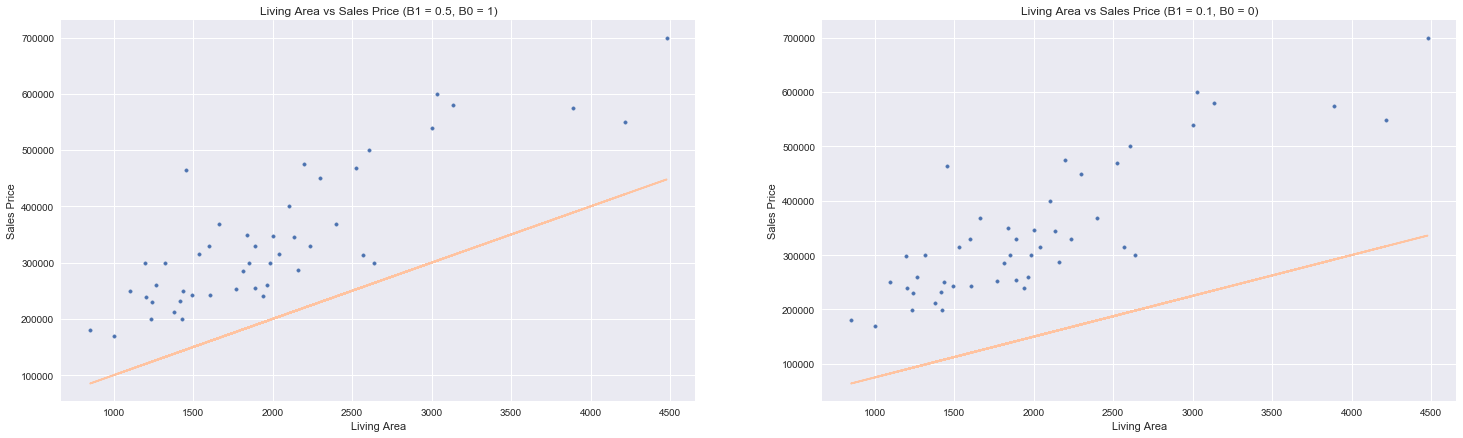

In [12]:
f, (ax1,ax2) = plt.subplots(1,2, figsize = (25,7))
ax1.scatter(X,y,marker=".")
ax1.plot(X,(1+100*X),color="#FFC3A0")
ax1.set_title("Living Area vs Sales Price (B1 = 0.5, B0 = 1)")
ax1.set_xlabel("Living Area"); ax1.set_ylabel("Sales Price")
ax2.scatter(X,y,marker=".")
ax2.plot(X,(0+75*X),color="#FFC3A0")
ax2.set_title("Living Area vs Sales Price (B1 = 0.1, B0 = 0)")
ax2.set_xlabel("Living Area"); ax2.set_ylabel("Sales Price")
plt.show()

We can observe here that our random numbers dont really get us very far. And this is with a very small dataset that shows a very strong linear relationship (not as common). There are many ways to determine the coefficients $\beta_0$ and $\beta_1$. One of the simplest is the Normal Equation.

### Normal Equation

Let's look at our equation for the slope from the lense of linear algebra. We'll combine $\beta_1$ and $\beta_0$ into one matrix ($\beta_0$ vector gets added as another column for $\beta_1$).

$$ y = \beta X$$

What happens if multiply both sides with $X^T$ (the transpose of the independent variables matrix): 

$$ X^T y = \beta X X^T$$

This is known as the Normal Equation. The normal equation minimizes the sum of the square differences between the left and right sides. If you remember a bit of linear algebra then you will see that we can shift the terms with our coefficient $\beta$ to the left and take the inverse: 

$$ \beta = ({X^TX})^{-1}X^Ty$$

Let's try and see what out put we get with this function to calculate $\beta$.

In [13]:
def estimate_coefficients_normal(X,y):
    '''
    Arguments:
        X -- numpy array of independent variables with dimensions (n, m)
            n - number of samples in the dataset
            m - number of independent variables
        y -- numpy array of dependent variable with dimensions (n, 1)
            n - number of samples in the dataset
    Output:
        Regression Coefficients
    '''
    X_ = X.copy()
    ones = np.ones((X_.shape[0],1))
    X_= np.append(X_,ones,1)
    
    beta = np.linalg.inv(X_.T.dot(X_)).dot(X_.T.dot(y))
    return beta[:-1],beta[-1]

In [14]:
#Calculating the regression coefficients
Beta_1_normal, Beta_0_normal = estimate_coefficients_normal(X,y)
print(f"Beta_1_normal: {Beta_1_normal}\n\
Beta_0_normal: {Beta_0_normal}")

Beta_1_normal: [[134.52528772]]
Beta_0_normal: [71270.49244873]


In [15]:
def predict_normal(X, Beta_1, Beta_0):
    '''
    Arguments:
        X -- numpy array of independent variables with dimension (n, m)
        Beta_1 -- Regression Coefficient for slope of best fit line with dimension (1,m)
        Beta_0 -- Regression Coefficient for intercept term with dimension (1,m)
    Output:
        numpy array of predictions with dimensions (n, m)
    '''
    predictions = np.array([Beta_1.T.dot(X[i,:])+Beta_0 for i in range(X.shape[0])])
    return predictions

y_predicted_normal = predict_normal(X, Beta_1_normal, Beta_0_normal)

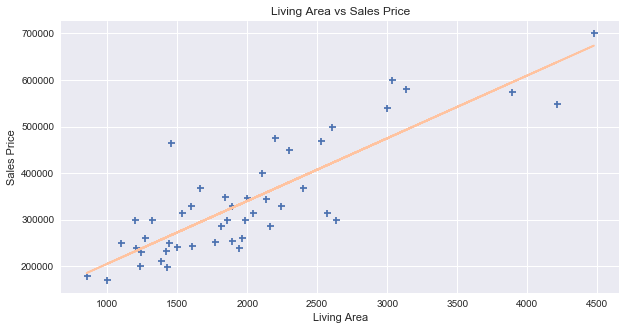

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(X,y,marker="+")
plt.plot(X,y_predicted_normal,color="#FFC3A0")
plt.title("Living Area vs Sales Price")
plt.xlabel("Living Area"); plt.ylabel("Sales Price")
plt.show()

Let's take a glance at our predictions in comparison to the true sales price of the houses.

In [19]:
for i in range(10):
    print(f"Predicted Value: {y_predicted_normal[i]} Actual Value: {y[i]}")

Predicted Value: [354311.69781212] Actual Value: [399900]
Predicted Value: [286510.95280112] Actual Value: [329900]
Predicted Value: [394131.18297731] Actual Value: [369000]
Predicted Value: [261758.29986059] Actual Value: [232000]
Predicted Value: [474846.35560945] Actual Value: [539900]
Predicted Value: [338303.18857341] Actual Value: [299900]
Predicted Value: [277632.28381158] Actual Value: [314900]
Predicted Value: [263238.07802551] Actual Value: [198999]
Predicted Value: [256915.38950266] Actual Value: [212000]
Predicted Value: [272251.27230277] Actual Value: [242500]


We see here that our predictions for the most part look pretty good! Well within a decent margin of error and seem to model our sales prices fairly well.

**Drawbacks of normal equation**:

- Normal Equation only works is $(XX^T)$ is non-singular (it is singular if its determinant is 0).
- Computing the inverse is computationally heavy for large datasets. One option would be to orthogonalize the matrix.



What is the core principal behind estimating the coefficients? How do we assess how good our regression line is? We need to choose $\beta_1$ and $\beta_0$ in a way that our function, $h(\theta)$ has the least distance from our training examples. That means we have to minimize the residuals between our training data and our predictions. For that we will need a cost function. 

### Loss Function
The loss function is just a function which we want to minimize. In this case, our loss function can be thought of as the distance between our predictions and the actual housing prices. There are many different types of loss functions used for different types of data, different types of statistical algorithms. For example there are the **L1** and **L2** loss functions.

- **L1 Loss (Least Absolute Deviations)**
    $$L1(X,y) = \sum^n_{i=1} \ | \ h(x_i) - y_i \ |$$
    
    The L1 loss takes the absolute value of the distances between the predictions and the true values. It is robust because it is not sensitive to outliers therefore the model will not be adjusted to minimize outliers. However, it does not amplify the errors like L2 Loss does.
    
    
- **L2 Loss (Least Squares Error)**
    $$L2(X,y) = \sum^n_{i=1} \ ( \ h(x_i) - y_i \ )^2$$
    
    The L2 loss amplifies the error to fit a much more stable and efficient model than L2 loss. However, it is not very robust as it is really sensitive to outliers and will adjust the model to minimize the outlier.

One form of the L2 Loss is used as evaluation metric for Linear Regression models. It is known as **Residual Standard Error** or the **RSE**. 

### RSE and $R^2$ Statistic
Associated with each of our observation is an error term $\epsilon$. Due to the presence of these error terms, even if knew the true regression line, we would not be able to perfectly predict $Y$ from $X$. The RSE is an estimate of the standard deviation of $\epsilon$. Roughly speaking, **it is the average amount that the response will deviate from the true regression line**.

$$ RSE = \sqrt{{1\over{n-2}} RSS} = \sqrt{ {1\over{n-2}} \sum^n_{i=1}{(y_i - \hat{y_i})^2}         } $$

where RSS is the residual sum of squares.



In [20]:
#We first start by taking the residual sum of squares (RSS)
def RSS(y_predicted, y):
    '''
    Arguments:
        y_predicted -- array of predictions using the regression model
        y -- dependent variable values
    Outputs:
        Returns the residual sume of squares
    '''
    return np.sum((y_predicted-y)**2, axis=0)

#We then get the residual standard error (RSE)
def RSE(RSS_, n):
    '''
    Arguments:
        RSS - residual sum of squares
        n - number of observations
    Outputs:
        returns the residual standard error
    '''
    return np.sqrt(RSS_/(n -2))

RSS_ = RSS(y_predicted_normal, y)
RSE_ = RSE(RSS_, y.shape[0])

print(f"Residual Standard Error: {RSE_}")

Residual Standard Error: [65568.36594997]


RSE here implies that actual house prices deviate by about $65,568 from our predictions. The number looks large but when we consider the house prices are in hundreds of thousands to millions, it is well within a decent margin of error. The RSE is considered a **measure of the lack of fit of the model** to the data. The smaller the RSE the better the fit.

The RSE is measured in the units of $Y$, it is not always clear what constitutes a good RSE. The **$R^2$ statistic** provides an alternative measure of fit. It is the **measure of the goodness of fit of the model**. It takes the form of a proportion—the proportion of variance explained—and so it always takes on a value between 0 and 1, and is independent of the scale of $Y$.

$$R^2 = {{TSS - RSS} \over TSS} = 1 - {RSS\over TSS}$$

where $TSS = \sum{(y_i - \bar{y_i})^2}$ is the total sum of squares. TSS measures the total variance in the response $Y$, and can be thought of as the amount of variability inherent in the response before the regression is performed. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression. Hence, TSS-RSS measures the amount of variability in the response that is explained (or removed) by performing the regression, and $R^2$ measures the proportion of variability in Y that can be explained using X.

In [27]:
#Calculating the R^2 statistic
y_mean = np.mean(y, axis =0)

def TSS(y_mean, y):
    '''
    Arguments:
        y_mean - mean of dependent variable y
        y - dependent variable values
    Outputs:
        Returns the total sum of squares
    '''
    return np.sum((y - y_mean)**2)

TSS_ = TSS(y_mean, y)

def R2(TSS_,RSS_):
    '''
    Arguments:
        TSS - Total sum of squares
        RSS _ Residual sum of squares
    Outputs:
        Returns the R2 statistic
    '''
    return 1 - (RSS_/TSS_)

R2_ = R2(TSS_, RSS_)

print(f"R2: {R2_}")

R2: [0.73100378]


Here, the $R^2$ statistic tells us that approximately 73% of the variability in the data can be explained through the living area.


### Ordinary Least Squares


Since the Normal Equation has certain constraints, can we use another method to estimate the regression coefficients? Let's reformulate the regression problem:

- Given a set of $n$ points $(X_i,y_i)$
- find the best fit line $\hat{Y_i} = \beta_0 + \beta_1 \ X_i$
- such that the sum of squared errors in $Y$, $\sum \ (Y_i - \hat{Y_i})^2$ is minimized

At this point, we can look at using the chain rule to derive the regression coefficients out of this equation. I will not go into the derivation but it can be [accessed here](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf). 

What we get out of the derivation are these two equations to estimate the regression coefficients:

$$\beta_1 = {Cov(X,y)\over{Var(X)}}$$

$$\beta_0 = \bar{y} - \beta_1 \ \bar{X}$$

In [41]:
#Let's write the code to do this    
def estimate_coefficients(X,y):
    '''
    Arguments:
        X -- numpy array of independent variables with dimensions (n, m)
            n - number of samples in the dataset
            m - number of independent variables
        y -- numpy array of dependent variable with dimensions (n, 1)
            n - number of samples in the dataset
    Output:
        Regression Coefficients
    '''
    cov = np.cov(X.squeeze(), y.squeeze())
    var = np.var(X.squeeze())
    beta_1 = np.divide(cov,var)
    
    x_mean = np.mean(X.squeeze())
    y_mean = np.mean(y.squeeze())
    beta_0 = y_mean - (beta_1 * x_mean)
    return beta_1[0,1], beta_0[0,1]


In [42]:
#Estimating the coefficients
Beta_1, Beta_0 = estimate_coefficients(X,y)
print(f"Beta_1: {Beta_1}, \n \
Beta_0: {Beta_0}")


Beta_1: 137.44975049676836, 
 Beta_0: 65419.57577208249


In [80]:
def R2_statistic(y_pred,y):
    n = len(y)
    y_mean = np.mean(y)
    RSS = np.sum((y_pred-y)**2, axis=0)
    RSE = np.sqrt(RSS/(n -2))
    TSE = np.sum((y - y_mean)**2)
    r2 = 1 - (RSS/TSE)
    return r2

R2_statistic((Beta_0 + (Beta_1*X)), y)
print(f"R2: {R2_}")

R2: [0.73100378]


This method worked just as good! 73% of the variability in the house sales price can be explained using the living area! This brings us to understanding another very important method of estimating the regression coefficients.

### Parametric Vs Non-Parametric Approach

**Parametric** approach reduces the problem of estimating function $f$ down to one of estimating a set of parameters. Assuming a parametric form of $f$ simplifies the problem of estimating $f$ because it is generally much easier to estimate a set of parameters, such as $\beta_0, \beta_1, ..., \beta_p$ in the linear model than it is to fit an entirely arbitary function $f$.

Examples: Regression, Neural Networks

**Non-parametric** methods do not make explicit assumptions about the functional form of $f$. Instead they seek an estimate of $f$ that gets as close to the data points as possible without being too rough or wiggly.

By avoiding the assumption of a particular functional form for $f$, they have the potential to accurately fit a wider range of possibile shapes for $f$. Any parametric approach brings with it the possibility that the functional form used to estimate $f$ is very different from the true $f$, in which case the resulting model will not fit the data well.

But non-parametric approaches do suffer from a major disadvantage: since they do not reduce the problem of estiating $f$ to a small number of parameters, a very large number of observations (far more than is typically needed for a parametric approach) is required in order to obtain an accurate estimate of $f$.

Examples: Support Vector Machines, k-nearest neighbors

**The Trade-off Between Prediction Accuracy and Model Interpretability**

_Why would we ever choose to use a more restrictive method instead of a very flexible approach?_
If we are mainly interested in inference, then restrictive models are much more interpretable. For instance, when inference is the goal, the linear model may be a good choice since it will be quite easy to understand the relationship between $Y$ and $X_1,X_2,...,X_p$.

In contrast, very flexible approaches can lead to such complicated estimates of $f$ that it is difficult to understand how any individual predictor is associated with the response.


### Bias-Variance Trade-Off

There are two kinds of errors we deal with during machine learning or statistical analysis.
1. Reducible Error
2. Irreducible Error

**Irreducible Error**&mdash;as the name suggests&mdash;cannot be reduced by the data we are using to make predictions. It comes along with the framework of our model where we assume that the data we have is enough to make predictions about our dependent variable. But there are always other variables which we dont possess data for. For example: We're trying to predict the fluctuation of stock prices by looking at a company's financial metrics and public image and making predictions based on those data points. However, there could be&mdash;and are&mdash;countless other factors, big and small, which affect a company's stock on a day to day basis which we havent taken into account for in our model. That is our irreducible error. 

**Reducible Error** on the other hand can be reduced based on tuning our statistical algorithm, or changing it to a better one, feature engineering, data addition etc. There are two main types of reducible errors:

- Error due to Bias
- Error due to Variance

**Bias** refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, buy a much simpler method.

For example, linear regression assumes that there is a linear relationship between the response variable $Y$ and the predictor variables $X_1,...,X_p$. It is unlikely that any real-life problem truly has such a simple linear relationship, and so performing regression will undoubtedly result in some bias in the estimate of $f$.

- Low Bias: Suggests less assumptions about the form of the target function.
- High-Bias: Suggests more assumptions about the form of the target function.

**Variance** is the error that is introduced when our model cannot generalize well to new data. Most flexible models will have higher variance because they've twisted and turned to fit the underlying data better. High variance can cause the model to become sensitive to random noise. Because of this models with high variance will not generalize well to new data. 

- Low Variance: Suggests small changes to the estimate of the target function with changes to the training dataset.
- High Variance: Suggests large changes to the estimate of the target function with changes to the training dataset.



### Train-Validation-Test Split

For evaluating our model, we should have three separate datasets:
1. _Training Set_ - This is the dataset we train our model on
2. _Validation Set_ - This is the dataset we tune our model on
3. _Test Set_ - This is the dataset we test our model on

There is a fundamental problem of overfitting the model. Our model might perform very well on our training set because that's all the data its already seen. But when used on new data, which it hasnt seen before, it will start failing. This implies that we have **overfit** the model to the training set.

However, if we evaluate it on a test set and then start tuning our model so that it performs better on our test set, that is in a way cheating and will not give us a good model. Tuning the model to match its performance on the test set is kind of like giving the model indirect access to the test set so it knows what to match exactly. This means that again, it will not generalize well.

Intead, we use an intermediatory evaluation dataset called the validation set. We test our model on the validation test and then tune it based on our validation test. Finally, once we have decided on the best model to use based on its performance on the validation set, we test it on the test set. In this way our final evaluation metric will be the models' performance on the test set.

Depending on the size of our data, we generally want our validation and test sets to be adequately proportional that they reflect a good sample from the population. This is important to eliminate any kind of bias or random chance. So if we have a total dataset size of 300000, our training set should be 240000, validation set should be 30,000 and test set should be 30,000. 

After evaluating on our validation set and tuning our parameters, we can measure if there has been an actual difference (and not just a difference by chance) by using something called a 'Rule of 30'. Where we want to measure if atleast 30 examples (depending on the size of our data) which were earlier incorrect, have been successfully classified. Thinking about it statistically, we want a large enough number that is statistcally significance. We can run significance tests on these as well.

### Sci-kit Learn (Machine Learning Library)

In [22]:
#Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale

#Initializing the LinearRegression class
lr = LinearRegression()

#Fitting the training data to the LinearRegression model
lr.fit(X,y)

print(f"Beta_0: {lr.intercept_},\n\
Beta_1: {lr.coef_}")

# Y Prediction
# Y_pred = lr.predict(X_test)

# # Calculating RMSE and R2 Score
# mse = mean_squared_error(y_test, Y_pred)
# rmse = np.sqrt(mse)
# r2_score = lr.score(X_test, y_test)

# print(f"RSE: {rmse}, R2: {r2_score}")



Beta_0: [71270.49244873],
Beta_1: [[134.52528772]]


### Further Learning

1. Polynomial Regression
2. Gradient Descent for Linear Regression
3. Multivariate Linear Regression